In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

(248, 474, 3)


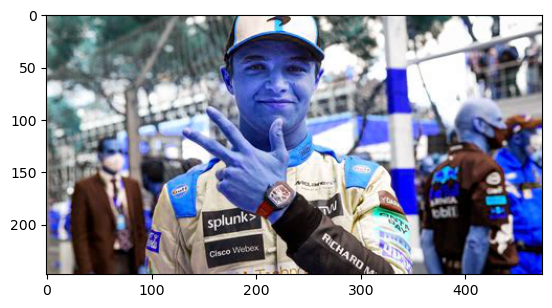

In [2]:
img = cv2.imread('test_images/Lando Norris did not feel like a _star_ afte.jpg')
print(img.shape)
plt.imshow(img);

In [3]:
grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
grey.shape

(248, 474)

In [4]:
grey

array([[176, 179, 156, ..., 250, 249, 249],
       [176, 177, 156, ..., 255, 247, 247],
       [179, 177, 160, ..., 255, 254, 254],
       ...,
       [131, 127, 123, ...,  65,  61,  73],
       [135, 131, 129, ...,  68,  89, 113],
       [132, 128, 127, ...,  73,  80, 112]], dtype=uint8)

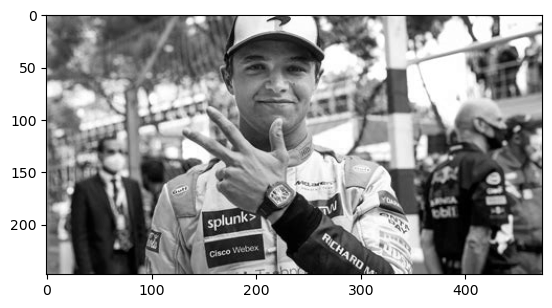

In [5]:
plt.imshow(grey, cmap = 'grey');

## OpenCV has documentation about face detection using Haar detection. That is what I will be using
See here: https://docs.opencv.org/3.4/d2/d99/tutorial_js_face_detection.html

In [6]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(grey, 1.3, 5)
faces #this gives an array of faces described as x,y,w,h. Meaning, x is where is starts, y is where it starts with height, then go over w or h 

array([[174,  20,  90,  90]], dtype=int32)

In [7]:
x,y,w,h = faces[0] # The coordinates of the face is stored here
x,y,w,h

(174, 20, 90, 90)

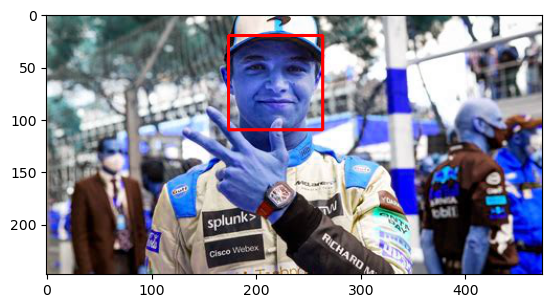

In [8]:
face_box = cv2.rectangle(img, (x,y), ((x+w),(y+h)),(255, 0, 0), 2)
plt.imshow(face_box);

### Eye Detection. This is just code from the haar cascades documentation
But basically, for every face in faces, it detects eyes within the face. Then it gets the region of interest with its region (
start at y and moves to y + h). Then does the same for x. Then it moves the roi grey into the eye cascade function and detects the eyes.
Then for each eye, it draws a box

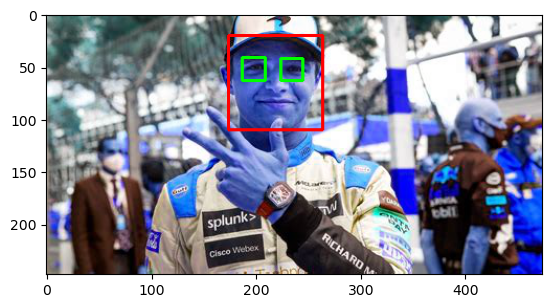

In [9]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_box = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_grey = grey[y:y+h, x:x+w]
    roi_color = face_box[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_grey)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_box, cmap='gray')
plt.show()

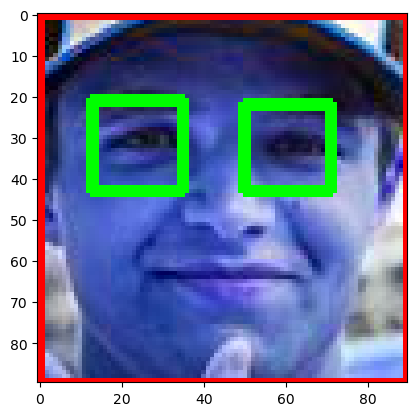

In [10]:
plt.imshow(roi_color)

In [11]:
def get_cropped_faces_with_two_eyes(img_path):
    """
    This function takes an image path and returns a cropped face if the image contains two eyes
    """
    img = cv2.imread(img_path)
    grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(grey, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_grey = grey[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_grey)
        if len(eyes) >= 2:
            return roi_color

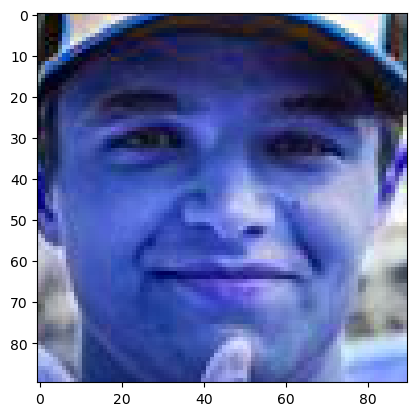

In [24]:
cropped_img = get_cropped_faces_with_two_eyes('test_images/Lando Norris did not feel like a _star_ afte.jpg')
plt.imshow(cropped_img);

How does the function work when one eye is obstructed? It should return nothing.

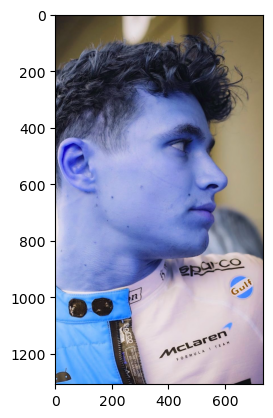

In [25]:
# Image with one eye
one = cv2.imread('test_images/Norris One Eye.jpg')
plt.imshow(one)

In [26]:
img_one_eye = get_cropped_faces_with_two_eyes('test_images/Norris One Eye.jpg')
# plt.imshow(img_one_eye) This returns an error because the function returned nothing
img_one_eye; #Returns nothing because the image does not have two eyes

### Now we have to store the cropped images in a folder. How will I do that?
* Make a list of image directories
* Make a cropped folder
* Store cropped images in cropped folder

In [39]:
#Get image directories
path_to_data = ('dataset/')
path_to_cropped = ('dataset/cropped/')

In [40]:
#store image directories
import os
img_dirs = []
for data in os.scandir(path_to_img):
    if data.is_dir():
        img_dirs.append(data.path)

In [41]:
img_dirs

['dataset/lando_norris', 'dataset/max_verstappen', 'dataset/cropped']

In [42]:
# Make cropped folder
import shutil
if os.path.exists(path_to_cropped):
    shutil.rmtree(path_to_cropped) #I am removing the cropped folder if it exists because I may want to refresh my images
os.mkdir(path_to_cropped)

In [44]:
for img_dir in img_dirs:
    f1_driver = img_dir.split('/')[-1]
    print(f1_driver)
    for photo in os.scandir(img_dir):
        img_roi = get_cropped_faces_with_two_eyes(photo.path)
        if img_roi is not None:
            cropped_folder = path_to_cropped + f1_driver
            # print(cropped_folder)

lando_norris
max_verstappen


error: OpenCV(4.7.0) /Users/runner/miniforge3/conda-bld/libopencv_1675730058235/work/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
